In [1]:
# all libraries required for the entire EDA

from requests import get
import requests
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Samuel Norman "Sam" Seaborn is a fictional character portrayed by Rob Lowe on the television serial drama The West Wing. Hence: sns
import pandas as pd

import datetime as dt
from scipy import stats
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(color_codes=True)
import fitter
from fitter import Fitter

In [2]:
db = requests.get('https://github.com/TinkerFrank/healthapp/raw/main/Build%201/db.sqlite3')
open('web.db', 'wb').write(db.content)

dbConnection = sqlite3.connect('web.db')

df = pd.read_sql_query(f"SELECT * FROM {'df4'}", dbConnection )
df.head()

,index,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,bmi
0,0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.1
1,1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.6
2,2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,36.0
3,3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.4
4,4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.6


In [3]:
df = df.drop(columns='index')

In [4]:
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,bmi
count,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000
mean,82.038823,184.045512,91.708801,2.404249,9.780639,2.269776,79.988358,6.484461,27.419437
std,7.087155,12.515009,25.246900,1.170096,6.910443,1.803397,7.453324,2.707867,8.306686
min,64.000000,154.000000,50.000000,0.100000,0.000000,0.000000,59.700000,0.700000,11.300000
25%,77.600000,175.000000,71.300000,1.500000,3.300000,0.600000,75.000000,4.400000,20.900000
50%,81.700000,184.000000,89.000000,2.200000,9.500000,1.700000,79.600000,6.300000,26.400000
75%,86.500000,193.000000,110.000000,3.200000,15.800000,4.000000,84.900000,8.400000,33.000000
max,100.300000,214.000000,163.600000,5.500000,22.200000,6.000000,100.400000,13.800000,51.500000


In [5]:
# #Quick Overall Graphical Overview (!warning, takes ~2min or more)
# g = sns.PairGrid(df)
# g.map(sns.lineplot)

In [6]:
df_corr = df.dropna().corr()
df_corr.style.background_gradient(cmap='RdBu')

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,bmi
genetic,1.000000,-0.038822,0.000170,-0.045166,-0.010465,-0.012933,0.947356,0.018005,0.014360
length,-0.038822,1.000000,0.032186,0.009023,-0.014031,-0.009524,-0.002917,0.009748,-0.418111
mass,0.000170,0.032186,1.000000,0.015653,-0.017406,-0.001905,-0.055586,0.006101,0.885167
exercise,-0.045166,0.009023,0.015653,1.000000,0.027432,-0.020427,0.075513,-0.007369,0.010860
smoking,-0.010465,-0.014031,-0.017406,0.027432,1.000000,-0.008643,-0.250217,0.011172,-0.005071
alcohol,-0.012933,-0.009524,-0.001905,-0.020427,-0.008643,1.000000,-0.065921,0.002924,0.002828
lifespan,0.947356,-0.002917,-0.055586,0.075513,-0.250217,-0.065921,1.000000,-0.013590,-0.056309
sugar,0.018005,0.009748,0.006101,-0.007369,0.011172,0.002924,-0.013590,1.000000,0.001370
bmi,0.014360,-0.418111,0.885167,0.010860,-0.005071,0.002828,-0.056309,0.001370,1.000000


<Axes: >

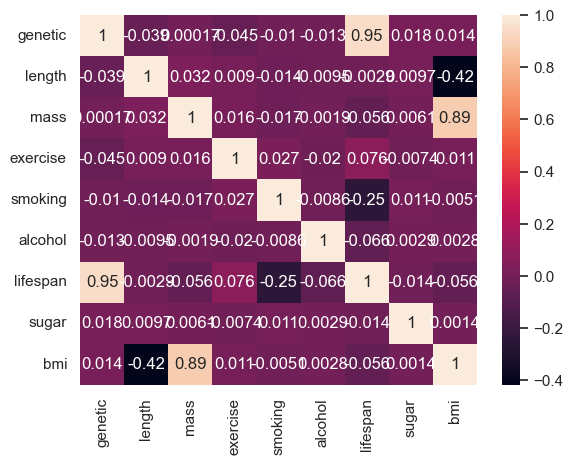

In [7]:
sns.heatmap(df_corr,annot=True)

In [8]:
from sklearn.ensemble import RandomForestRegressor
train, test = train_test_split(df, test_size=0.2, random_state=42)

X = train.drop(columns=['lifespan'])
y = train.lifespan

rng_forest_regr = RandomForestRegressor(n_estimators=300)
rng_forest_regr.fit(X,y)

RandomForestRegressor(n_estimators=300)

In [9]:
rng_forest_score = rng_forest_regr.score(test.drop(columns=['lifespan']),test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}):', rng_forest_score)

coefficient of determination(R²): 0.9754491001519238


In [18]:
regr = linear_model.LinearRegression()
regr.fit(X, y) 

#R-squared model score
score = regr.score(test.drop(columns=['lifespan']),test.lifespan)
rsquaredscore = score
print(score)

0.9820618333051058


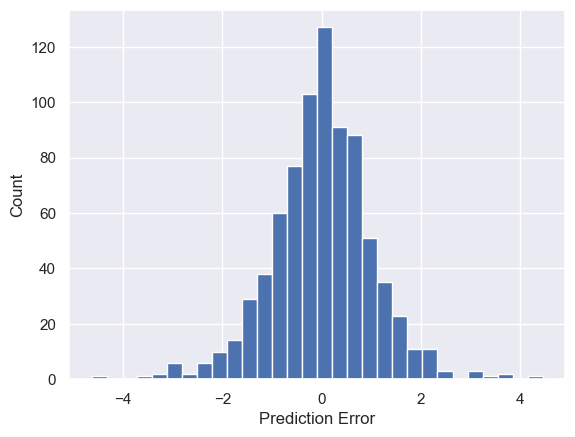

In [22]:
p_test = regr.predict(test.drop(columns=['lifespan']))
error = p_test.flatten() - test.lifespan.values
plt.hist(error,bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.show()

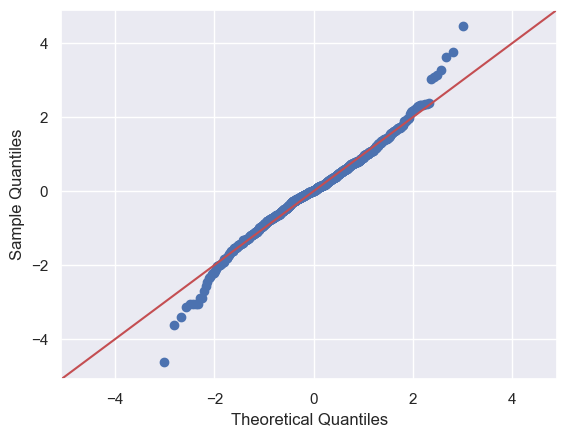

In [23]:
import statsmodels.api as sm

fig = sm.qqplot(error,line='45')
plt.show()

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
t,0.223979,725.645272,-6487.899371,inf,0.026211,0.635031
pearson3,0.296177,849.944677,-6265.492144,inf,0.047353,0.054531
lognorm,0.296415,855.339283,-6264.853630,inf,0.049478,0.039231
norm,0.297297,848.690582,-6269.167988,inf,0.049637,0.038259
chi2,0.342873,862.919230,-6148.955644,inf,0.070833,0.000644


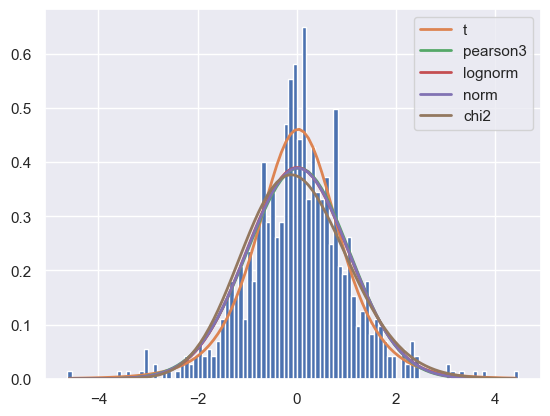

In [26]:
f = Fitter(error, distributions=['norm','uniform','t','pearson3','loguniform', 'lognorm','chi2', 'f'])
f.fit()
f.summary()

In [10]:
feature = 'alcohol'

<Axes: xlabel='alcohol', ylabel='Count'>

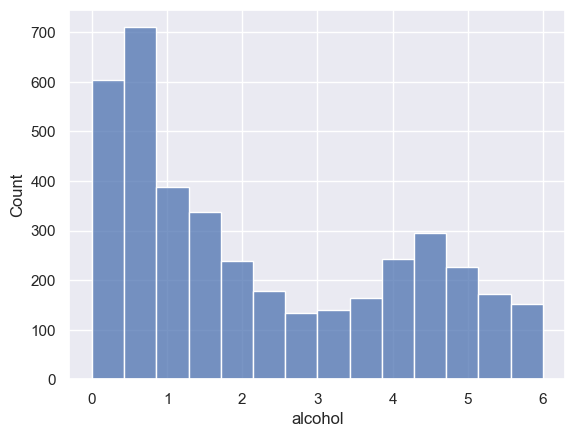

In [11]:
sns.histplot(df[feature])

Fitting 8 distributions: 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,3.383067,450.075531,-28090.538002,inf,0.114934,3.186476e-46
pearson3,3.476444,425.856817,-27982.255009,inf,0.107274,2.615045e-40
chi2,3.577533,431.992411,-27868.260943,inf,0.097544,2.170547e-33
uniform,4.103648,362.351894,-27330.892470,inf,0.240139,2.536315e-202
norm,4.520737,414.354847,-26945.924171,inf,0.158697,5.865445e-88


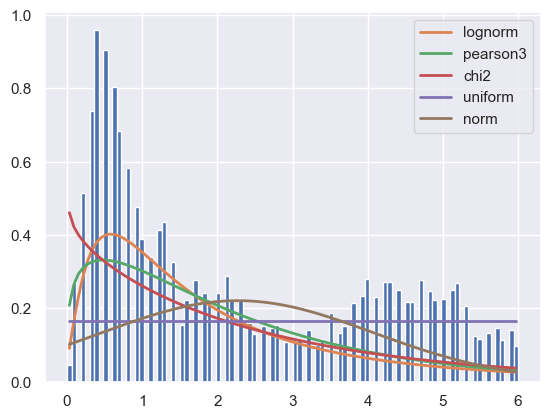

In [12]:
featurenp = np.array(df[feature])
f = Fitter(featurenp, distributions=['norm','uniform','t','pearson3','loguniform', 'lognorm','chi2', 'f'])
f.fit()
f.summary()

Chi2 distribution, sqrt it = normal distribution 

In [13]:
df[feature].head()

0    2.4
1    0.4
2    4.6
3    1.0
4    4.9
Name: alcohol, dtype: float64

In [14]:
import math
df[feature] = df[feature].apply(lambda x: math.sqrt(x))

In [15]:
df[feature].head()

0    1.549193
1    0.632456
2    2.144761
3    1.000000
4    2.213594
Name: alcohol, dtype: float64

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  4.03it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,25.447609,183.175947,-20073.880205,inf,0.173569,3.024808e-105
f,25.455267,249.301620,-20056.107081,inf,0.109649,4.244613e-42
chi2,25.489952,247.565956,-20058.980035,inf,0.110992,3.969979e-43
pearson3,25.489967,247.562564,-20058.977664,inf,0.110990,3.979877e-43
lognorm,25.866792,239.343837,-20000.614890,inf,0.111463,1.716057e-43


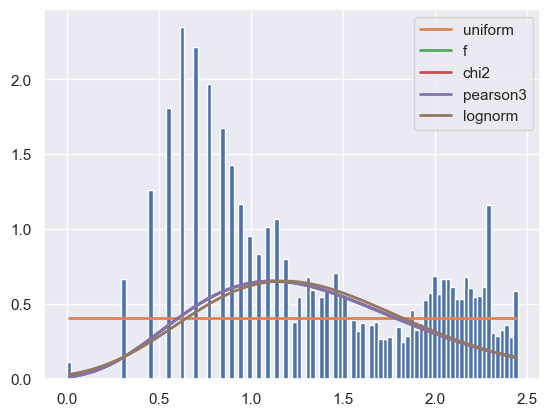

In [16]:
featurenp = np.array(df[feature])
f = Fitter(featurenp, distributions=['norm','uniform','t','pearson3','loguniform', 'lognorm','chi2', 'f'])
f.fit()
f.summary()

In [17]:
# create df_q to have the values for the input questions to be asked. 
data_questions = {'feature': ['genetic', 'length', 'mass', 'alcohol', 'sugar', 'smoking', 'exercise'],
        'acc_min': [50,140,40,0,0,0,0],
        'acc_max': [121,221,171,21,21,41,9],
        'per':['age in years','in cm','in kg','consumption in glasses per day',
               'consumption in cubes per day','in sigarettes per day','in hours per day'] }

df_q = pd.DataFrame(data_questions) 


def input_q(name):
    min,max, per = df_q.loc[df_q['feature'] == name, ['acc_min','acc_max', 'per']].values[0]
    return int(input(f"Please enter, {name} {per} in the range: {min}-{max-1} ", range(min,max)))

# initialize data of lists.
data = {'genetic':[], 'length':[], 'mass':[], 'alcohol':[], 'sugar':[], 'smoking':[], 'exercise':[], 'bmi':[]}

# Create DataFrame
df_input = pd.DataFrame.from_dict(data)

for column in df_input:
    input_q(column)

TypeError: Kernel.raw_input() takes from 1 to 2 positional arguments but 3 were given